In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


# Importing all Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Mounting** **Google** **Drive**

In [ ]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
dataset__path = "/content/drive/MyDrive/DATA"
test_path = "/content/drive/MyDrive/TEST"
labels_path = "/content/drive/MyDrive/labels.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading** **the** **labels** **and** **Images**

In [ ]:
# Load Class Labels
labels_df = pd.read_csv(labels_path)
labels_dict = dict(zip(labels_df["ClassId"], labels_df["Name"]))

In [ ]:
# Load images and labels
X, y = [], []
image_size = (128, 128)

for class_id in range(30):
    class_dir = os.path.join(dataset__path, str(class_id))
    if os.path.exists(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            img = cv2.imread(image_path)
            img = cv2.resize(img, image_size)
            X.append(img)
            y.append(class_id)

In [ ]:
X = np.array(X) / 255.0
y = to_categorical(y, num_classes=30)

**Plotting** **some** **images** **from** **drive**

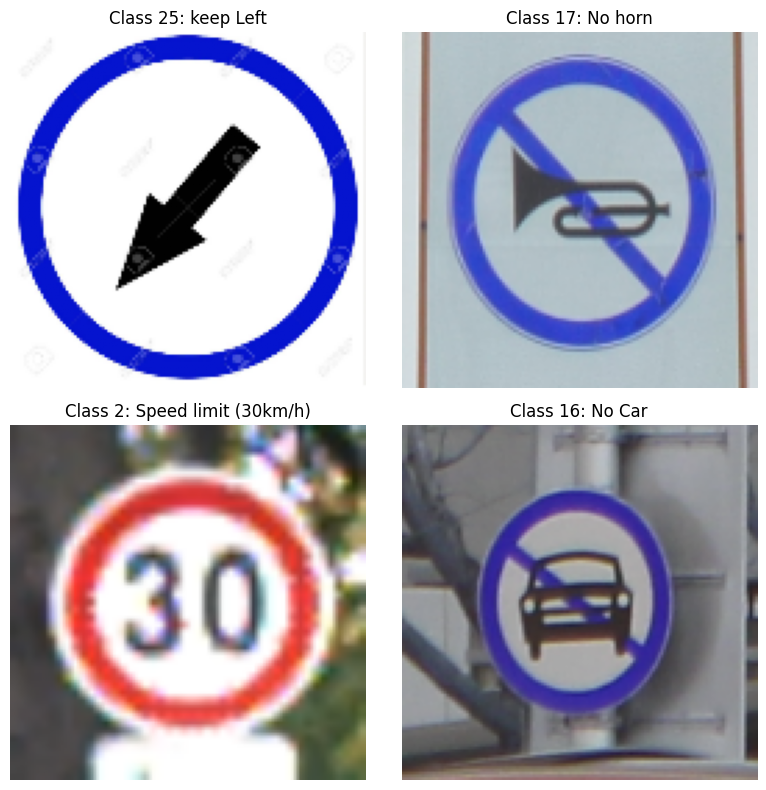

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Class Labels (Ensure this is included in your code)
labels_df = pd.read_csv('/content/drive/MyDrive/labels.csv')  # Update path if necessary
class_dict = dict(zip(labels_df["ClassId"], labels_df["Name"]))  # Mapping ClassID to Name

# Select 4 random indices
random_indices = np.random.choice(len(X), 4, replace=False)

# Create a figure with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Flatten the axes array to easily loop through it
axes = axes.flatten()

# Loop through the 4 random images
for i, idx in enumerate(random_indices):
    axes[i].imshow(X[idx])
    axes[i].axis('off')
    class_id = np.argmax(y[idx])
    axes[i].set_title(f'Class {class_id}: {class_dict[class_id]}')

plt.tight_layout()
plt.show()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory  # Correct import

# Ensure numeric sorting of classes
class_names = sorted(os.listdir(dataset__path), key=lambda x: int(x))
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset__path,
    shuffle=True,
    image_size=(64, 64),
    batch_size=32,
    seed=123,
    validation_split=False
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset__path,
    shuffle= False,
    image_size=(64, 64),
    batch_size=32,
    seed=123,
    validation_split=False,
)


print("✅ Final Class Order:", class_names)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    shuffle=False,
    image_size=(64, 64),
    batch_size=32,
    validation_split=False
)
# Ensure ClassId is int in case it's read as string from CSV
labels_df['ClassId'] = labels_df['ClassId'].astype(int)

# Create mapping dictionary
class_mapping = dict(zip(labels_df['ClassId'], labels_df['Name']))

# Safely map class indices to their names
try:
    class_names = [class_mapping[int(cls)] for cls in class_names]
    print(f"Class Names : {class_names}")
except KeyError as e:
    print(f"Error: Class ID {e} not found in labels_df. Please verify all class IDs exist.")


Found 743 files belonging to 30 classes.
Found 743 files belonging to 30 classes.
✅ Final Class Order: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
Found 285 files belonging to 30 classes.
Class Names : ['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left', 'Unknown7', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'No entry', 'No stopping', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn']


In [ ]:
class_names = [class_mapping[int(cls)] for cls in class_names]

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    shuffle=False,
    image_size=(64, 64),
    batch_size=32,
    validation_split=False
)

Found 285 files belonging to 30 classes.


In [ ]:
# Ensure ClassId is int in case it's read as string from CSV
labels_df['ClassId'] = labels_df['ClassId'].astype(int)

# Create mapping dictionary
class_mapping = dict(zip(labels_df['ClassId'], labels_df['Name']))

# Safely map class indices to their names
try:
    class_names = [class_mapping[cls] for cls in class_names]

    print(f"Class Names : {class_names}")
except KeyError as e:
    print(f"Error: Class ID {e} not found in labels_df. Please verify all class IDs exist.")

Error: Class ID 'Speed limit (5km/h)' not found in labels_df. Please verify all class IDs exist.


In [ ]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [ ]:
num_classes = len(class_names)
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    image = data_augmentation(image)
    label = tf.one_hot(label, depth=num_classes)
    return image, label

# Apply to datasets
train_ds = train_ds.map(process).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(process).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(process).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf
# Model
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),

    # First Conv Block
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Second Conv Block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Third Conv Block
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten Layer
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Old one

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train)

In [ ]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = tf.keras.Sequential([
    layers.Input(shape=(128, 128, 3)),  # match your image size
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),  # this adapts to the previous layer
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,396,190 (28.21 MB)

 Trainable params: 7,396,190 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=15,
                    callbacks=[early_stopping])

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 932ms/step - accuracy: 0.0364 - loss: 4.0431 - val_accuracy: 0.0811 - val_loss: 3.3818
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 942ms/step - accuracy: 0.0991 - loss: 3.2089 - val_accuracy: 0.1892 - val_loss: 3.1419
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 938ms/step - accuracy: 0.2166 - loss: 2.8647 - val_accuracy: 0.1802 - val_loss: 2.9025
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 904ms/step - accuracy: 0.2929 - loss: 2.4770 - val_accuracy: 0.3604 - val_loss: 2.5872
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 911ms/step - accuracy: 0.3953 - loss: 2.1522 - val_accuracy: 0.4775 - val_loss: 2.1793
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 977ms/step - accuracy: 0.4812 - loss: 1.7801 - val_accuracy: 0.5225 - val_loss: 2.0909
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 974ms/step - accuracy: 0.5195 - loss: 1.6738 - val_accuracy: 0.5766 - val_loss: 1.7417
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 898ms/step - accuracy: 0.5927 - loss: 1.4107 - val_accu

In [ ]:
# Train Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=25,
                    callbacks=[early_stopping])

Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6779 - loss: 1.0447 - val_accuracy: 0.7477 - val_loss: 0.9404
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6446 - loss: 1.2244 - val_accuracy: 0.7207 - val_loss: 0.9536
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6457 - loss: 1.1562 - val_accuracy: 0.7748 - val_loss: 0.8936
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6689 - loss: 1.0876 - val_accuracy: 0.7658 - val_loss: 0.9215
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7033 - loss: 0.9641 - val_accuracy: 0.8018 - val_loss: 0.7721
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6892 - loss: 1.1148 - val_accuracy: 0.7748 - val_loss: 0.7399
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7373 - loss: 0.9292 - val_accuracy: 0.7568 - val_loss: 0.7932
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7505 - loss: 0.7632 - val_accuracy: 0.7838 - val_loss:

In [ ]:
# Train Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=5,
                    callbacks=[early_stopping])

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8610 - loss: 0.5713 - val_accuracy: 0.7297 - val_loss: 1.0147
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 939ms/step - accuracy: 0.8837 - loss: 0.4471 - val_accuracy: 0.7838 - val_loss: 0.7964
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 927ms/step - accuracy: 0.8865 - loss: 0.3742 - val_accuracy: 0.7748 - val_loss: 1.0020
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 883ms/step - accuracy: 0.8782 - loss: 0.4615 - val_accuracy: 0.7477 - val_loss: 0.9935
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 895ms/step - accuracy: 0.8818 - loss: 0.3950 - val_accuracy: 0.8108 - val_loss: 0.7356


In [ ]:
print("Evaluate Model")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Evaluate Model
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.8391 - loss: 0.4912
Test Accuracy: 0.87


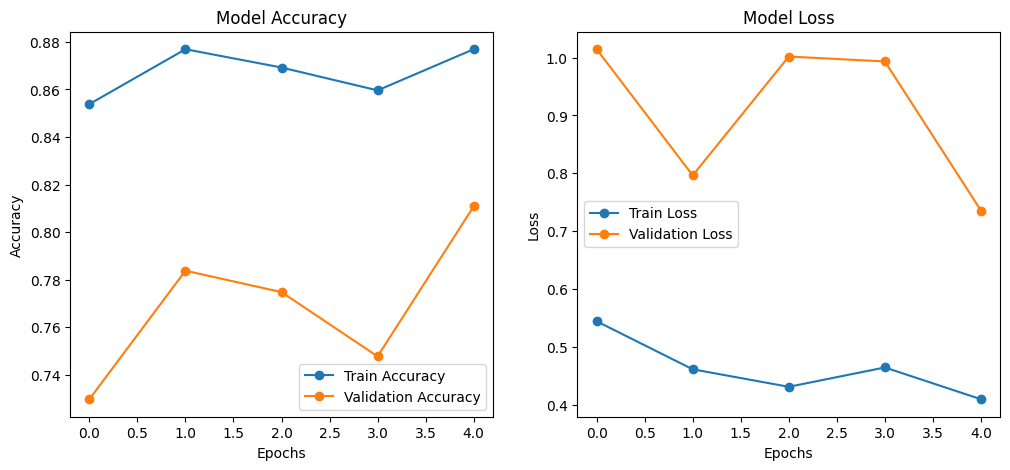

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [ ]:
# Predictions & Metrics
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step


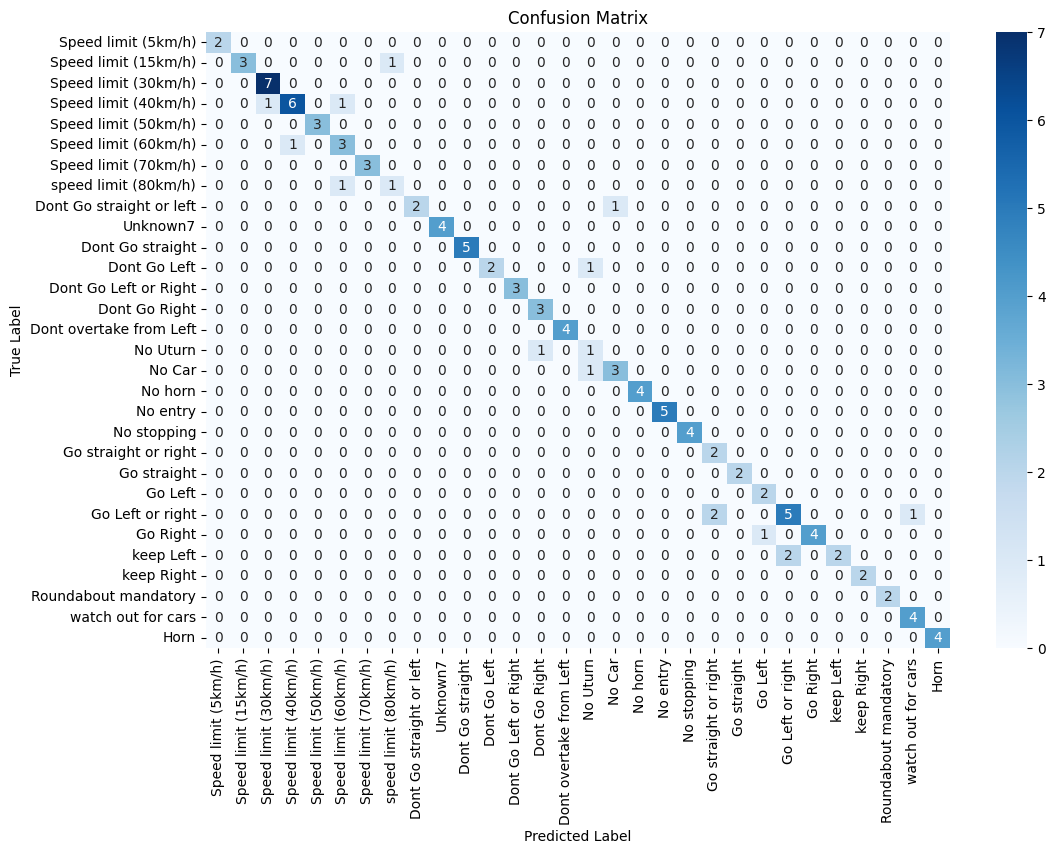

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_df['Name'].values, yticklabels=labels_df['Name'].values)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


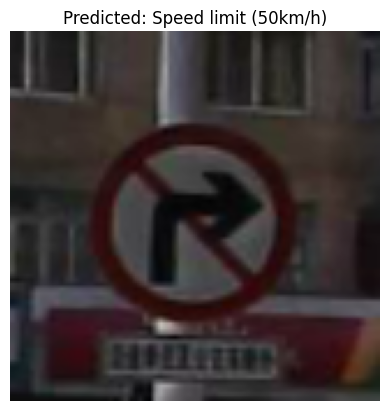

In [ ]:
# Test on New Image
def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, image_size) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f"Predicted: {labels_dict[predicted_class]}")
    plt.show()

predict_sign("/content/drive/MyDrive/DATA/13/013_0021_j.png") # Image from train dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


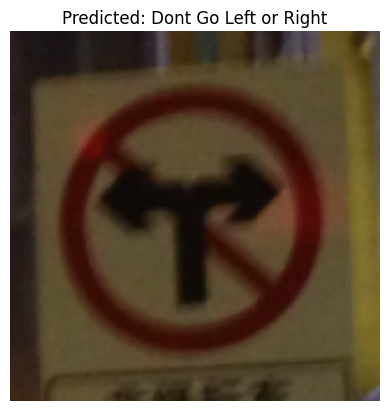

In [ ]:
# Image from test dataset
predict_sign("/content/drive/MyDrive/TEST/12/012_0003_j.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


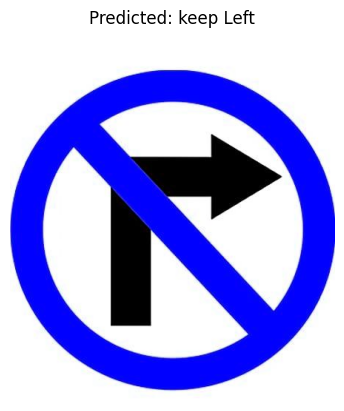

In [ ]:
# Image from google
predict_sign("/content/drive/MyDrive/mile3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


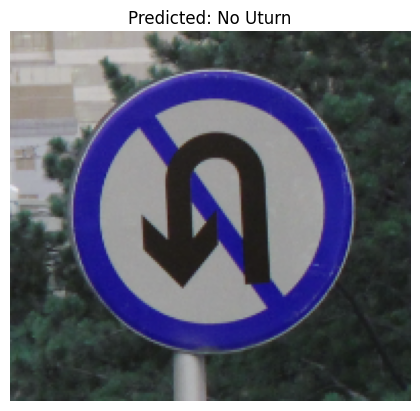

In [ ]:
predict_sign("/content/drive/MyDrive/DATA/15/015_0003.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


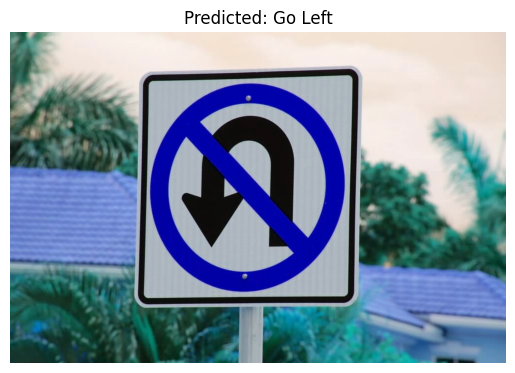

In [ ]:
#Image from google
predict_sign("/content/drive/MyDrive/no-u-turn.jpg")

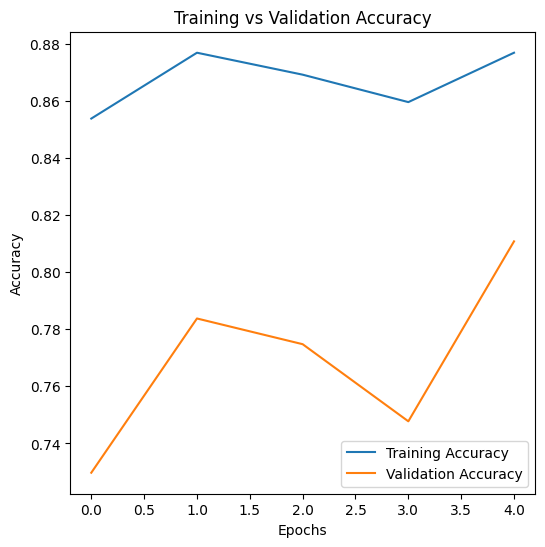

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Training vs Validation Accuracy
plt.figure(figsize=(6, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Labeling the axes and title
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Show the plot
plt.show()


In [ ]:
!pip install pyngrok

In [ ]:
!pip install streamlit pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import tensorflow as tf
from PIL import Image
from tensorflow import keras

model.save("best_model.keras")

In [ ]:
%%writefile app.py

st.title("Road Sign Detection")
st.write("Upload an image to classify the roadside sign")

uploaded_file = st.file_uploader("Choose an image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)

    if st.button("Classify"):
        predicted_label, confidence = predict(image)
        st.write(f"Predicted Label: {predicted_label}")
        st.write(f"Confidence: {confidence:.2f}")

    st.subheader("Model Performance Metrics")
    st.write(f"Accuracy: {accuracy:.2f}")
    st.write(f"Precision: {precision:.2f}")
    st.write(f"Recall: {recall:.2f}")
    st.write(f"F1 Score: {f1:.2f}")

Writing app.py


In [ ]:
!ngrok authtoken 2ussd4JF1ZrxBGzHiESidJXgKwe_7CBKkNCqpofYwLb5nnJka
!streamlit run app.py & /dev/null &

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
/bin/bash: line 1: /dev/null: Permission denied



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.239.180:8501

  Stopping...


In [ ]:
!pkill streamlit

In [ ]:
!pkill ngrok